# Link Prediction 

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import linkpred
import networkx as nx
import multiprocessing
import matplotlib.pyplot as plt

from stellargraph import StellarGraph
from stellargraph.data import EdgeSplitter
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from math import isclose
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

%matplotlib inline

## Import edgelist

In [2]:
df = pd.read_csv("../data_collection/data/df_nickname.csv", skipinitialspace=True, na_values='?', keep_default_na=True)   
def read_net_w(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[1], l[2], weight=int(float(l[3].rstrip('\n'))))
    return g


def sample_data(g): 
    degree_calc = {node: val for (node, val) in g.degree()}
    degree = dict(sorted(degree_calc.items(), key=lambda item: item[1], reverse = True))
    sample = []
    for k, v in degree.items():
        if(v >=  20):
            sample.append(k)   
    sample_data = g.subgraph(sample)
    return sample_data



In [3]:
g = read_net_w("../data_collection/data/df_nickname.csv")

In [4]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
g.remove_nodes_from([n for n in g if n not in set(Gcc[0])])

In [5]:
g.remove_edges_from(list(nx.selfloop_edges(g)))

In [6]:
g_small = sample_data(g)

* after the data sampling, we transform the *nx.Graph()* into a *StellarGraph*

In [7]:
stellar_g = StellarGraph.from_networkx(g_small)

In [10]:
nx.info(g_small)

'Name: \nType: Graph\nNumber of nodes: 1132\nNumber of edges: 4558\nAverage degree:   8.0530'

# Unsupervised Link Prediction
In this section we tried link prediction using: 
* Common Neighbours
* Jaccard
* Adamic Adar
* Katz
* SimRank

In [11]:
cn = linkpred.predictors.CommonNeighbours(g_small, excluded=g_small.edges()) # We aim to predict only new links, thus we exclude existing ones
cn_results = cn.predict()

top = cn_results.top(20)
for edge, score in top.items():
    print(edge, score)

yeosvt - goIfyang 56.0
realDonaldTrump - JoeBiden 56.0
KamalaHarris - JoeBiden 48.0
treasureez - seohopalett 46.0
treasureez - ourmingi 46.0
treasureez - onesttarr 46.0
treasureez - jeongughk 46.0
treasureez - jeonglndie 46.0
treasureez - hautecuIt 46.0
treasureez - filterjongho 46.0
treasureez - arttsan 46.0
treasureez - ARSB0Y 46.0
seohopalett - ourmingi 46.0
seohopalett - onesttarr 46.0
seohopalett - jeongughk 46.0
seohopalett - jeonglndie 46.0
seohopalett - hautecuIt 46.0
seohopalett - filterjongho 46.0
seohopalett - arttsan 46.0
seohopalett - ARSB0Y 46.0


In [12]:
jc = linkpred.predictors.Jaccard(g_small, excluded=g_small.edges())
jc_results = jc.predict()

top = jc_results.top(20)
for edge, score in top.items():
    print(edge, score)

zoyastorm - aelinfeelings 1.0
zorovlog - kawatsumu 1.0
zorovlog - fall_exo 1.0
zjmrvrd - zaynpoetries 1.0
zjmrvrd - leestairs 1.0
zaynpoetries - leestairs 1.0
yungtracyt - tweenhesikhash 1.0
yungtracyt - tuziszn 1.0
yungtracyt - teamisthestar09 1.0
yungtracyt - sneaky__ben 1.0
yungtracyt - kevsayce7 1.0
yungtracyt - greekfreakszn 1.0
yungtracyt - conner2645 1.0
youryoongii - ughmooon 1.0
youryoongii - sakariaam 1.0
youryoongii - rsvaughanw 1.0
youryoongii - perragurl 1.0
youryoongii - paradisexsa 1.0
youryoongii - orljln 1.0
youryoongii - micasaconbts 1.0


In [13]:
aa = linkpred.predictors.AdamicAdar(g_small, excluded=g_small.edges())
aa_results = aa.predict()

top = aa_results.top(20)
for edge, score in top.items():
    print(edge, score)

yeosvt - goIfyang 45.892912340219254
realDonaldTrump - JoeBiden 22.865727850914524
LobCityBlake - K8rlo 21.683575334127262
coresters - NotAMook 20.240880293238302
coresters - LockdownSimmons 20.240880293238302
coresters - LobCityBlake 20.240880293238302
coresters - K8rlo 20.240880293238302
NotAMook - LockdownSimmons 20.240880293238302
NotAMook - LobCityBlake 20.240880293238302
NotAMook - K8rlo 20.240880293238302
LockdownSimmons - LobCityBlake 20.240880293238302
LockdownSimmons - K8rlo 20.240880293238302
KamalaHarris - JoeBiden 19.405824418581037
treasureez - seohopalett 16.704462051559513
treasureez - ourmingi 16.704462051559513
treasureez - onesttarr 16.704462051559513
treasureez - jeongughk 16.704462051559513
treasureez - jeonglndie 16.704462051559513
treasureez - hautecuIt 16.704462051559513
treasureez - filterjongho 16.704462051559513


In [14]:
kz = linkpred.predictors.Katz(g_small, excluded=g_small.edges())
kz_results = kz.predict()

top = kz_results.top(20)
for edge, score in top.items():
    print(edge, score)

Computing matrix powers: [############################################################] 5/5


In [15]:
simrank = linkpred.predictors.SimRank(g_small, excluded=g_small.edges())
simrank_results = simrank.predict(c=0.5)

top = simrank_results.top(20)
for edge, score in top.items():
    print(edge, score)

zuloaga_lab - zoyastorm 0.0008817586775772495
zuloaga_lab - zoyaislove 0.0008817586775772495
zuloaga_lab - zorovlog 0.0008817586775772495
zuloaga_lab - zomburke 0.0008817586775772495
zuloaga_lab - zjmrvrd 0.0008817586775772495
zuloaga_lab - zirim_ 0.0008817586775772495
zuloaga_lab - ziconiconiii 0.0008817586775772495
zuloaga_lab - zen4ever2us 0.0008817586775772495
zuloaga_lab - zaynstarfalls 0.0008817586775772495
zuloaga_lab - zaynpoetries 0.0008817586775772495
zuloaga_lab - zalesperson 0.0008817586775772495
zuloaga_lab - yzseok 0.0008817586775772495
zuloaga_lab - yvettejacqr 0.0008817586775772495
zuloaga_lab - yuricmis 0.0008817586775772495
zuloaga_lab - yungtracyt 0.0008817586775772495
zuloaga_lab - youryoongii 0.0008817586775772495
zuloaga_lab - yourwinner3 0.0008817586775772495
zuloaga_lab - youngcornchip 0.0008817586775772495
zuloaga_lab - youareadore 0.0008817586775772495
zuloaga_lab - yorich_speaking 0.0008817586775772495


In [16]:
rnd = linkpred.predictors.Random(g_small, excluded=g_small.edges())
rnd_results = rnd.predict()

top = simrank_results.top(5)
for edge, score in top.items():
    print(edge, score)

zuloaga_lab - zoyastorm 0.0008817586775772495
zuloaga_lab - zoyaislove 0.0008817586775772495
zuloaga_lab - zorovlog 0.0008817586775772495
zuloaga_lab - zomburke 0.0008817586775772495
zuloaga_lab - zjmrvrd 0.0008817586775772495


## Evaluation (unsupervised)

In [14]:
import itertools
from linkpred.evaluation import Pair

In [15]:
import random

In [18]:
H = g_small.copy()

# Create test network
test = H.subgraph(random.sample(g_small.nodes(), 129))
print("Test nodes: ", len(test.nodes()))
print("Test edges: ", len(test.edges()))

# Exclude test network from learning phase
training = H.copy()
training.remove_edges_from(test.edges())

print("\nTraining: ", len(training.nodes()))
print("Training: ", len(training.edges()))

# Node set
nodes = list(H.nodes())
nodes.extend(list(test.nodes()))


Test:  129
Test:  66

Training:  1132
Training:  4492
Total 1261


After that, we can apply the predictors to the training network

In [20]:
# Compute the test set and the universe set
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

In [21]:
len(universe)

640146

In [22]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()


In [23]:
jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

In [24]:
aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

In [25]:
simrank = linkpred.predictors.SimRank(training, excluded=training.edges())
simrank_results = simrank.predict()

In [26]:
random = linkpred.predictors.Random(training, excluded=training.edges())
rnd_results = random.predict()


* we evaluate the performance also on the test set

In [27]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)

In [28]:
simrank_evaluation = linkpred.evaluation.EvaluationSheet(simrank_results, test, universe)

In [29]:
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)


In [ ]:
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)

In [ ]:
rn_evaluation = linkpred.evaluation.EvaluationSheet(rnd_results, test, universe)

In [ ]:
def print_res(res):
    res=sorted(res,key=lambda x: x[1],reverse=True)
    for i in res[:10]:
        print(i)

In [ ]:
print_res(aa_results)
print("")
print("")
print("")
print_res(cn_results)
print("")
print("")
print("")
print_res(jc_results)
print("")
print("")
print("")
print_res(kz_results)
print("")
print("")
print("")
print_res(simrank_results)

* ROC curve

In [ ]:
plt.plot(simrank_evaluation.fallout(), simrank_evaluation.recall(), label="SimRank")
plt.plot(rnd_evaluation.fallout(), rnd_evaluation.recall(), label="Random Pred")

plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

In [ ]:

plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(rnd_evaluation.fallout(), rnd_evaluation.recall(), label="Random Pred")


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [46]:
preds = list(nx.preferential_attachment(training,universe))
pref_results=[]
for u, v, p in preds:
    pref_results.append([u,v,p])
pref_results=sorted(pref_results,key=lambda x: x[2],reverse=True)
pref_results

[['realDonaldTrump', 'JoeBiden', 5032],
 ['realDonaldTrump', 'goIfyang', 4440],
 ['goIfyang', 'JoeBiden', 4080],
 ['realDonaldTrump', 'KamalaHarris', 3922],
 ['KamalaHarris', 'JoeBiden', 3604],
 ['yeosvt', 'realDonaldTrump', 3552],
 ['realDonaldTrump', 'ayrinweloveyou', 3330],
 ['yeosvt', 'JoeBiden', 3264],
 ['goIfyang', 'KamalaHarris', 3180],
 ['ayrinweloveyou', 'JoeBiden', 3060],
 ['realDonaldTrump', 'CNN', 2960],
 ['realDonaldTrump', 'info4u2know', 2960],
 ['yeosvt', 'goIfyang', 2880],
 ['info4u2know', 'JoeBiden', 2720],
 ['JoeBiden', 'CNN', 2720],
 ['goIfyang', 'ayrinweloveyou', 2700],
 ['realDonaldTrump', 'missionaryblmm', 2664],
 ['yeosvt', 'KamalaHarris', 2544],
 ['missionaryblmm', 'JoeBiden', 2448],
 ['realDonaldTrump', 'nytimes', 2442],
 ['realDonaldTrump', 'biggles14', 2442],
 ['realDonaldTrump', 'POTUS', 2442],
 ['info4u2know', 'goIfyang', 2400],
 ['goIfyang', 'CNN', 2400],
 ['ayrinweloveyou', 'KamalaHarris', 2385],
 ['soloyochapin', 'realDonaldTrump', 2368],
 ['realDonaldTr

In [47]:
def intersect(result_1, result_2, dim, name):
    print(f"{name}")
    int_1_2=[]
    count=0
    for item_1 in result_1:
        for item_2 in result_2:
            if item_1[0]==item_2[0]:
                int_1_2.append(item_1[0])
                count+=1
    print(set(int_1_2))
    return int_1_2

In [48]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [49]:
aa_cn = intersect(aa_results, cn_results, 300, "AA vs CN")
aa_jc = intersect(aa_results, jc_results, 300, "AA vs JC")
aa_aa = intersect(aa_results, aa_results, 300, "AA vs AA")
aa_sm = intersect(aa_results, simrank_results, 300, "AA vs SM")


AA vs CN
{'saviorofsd2', 'formergoper', 'NBA', 'buddahszn', 'breeziebs', 'SpeakerPelosi', 'adrwtownsel', 'apocsnet', 'KamalaHarris', 'titansmitt', 'capnamerica18', 'mindpiercer', 'motor_felipe', 'peacemirembe6', 'atrupar', 'flightofinquiry', 'ASH1SLAND', '_SJPeace_', 'jermaine_hall_', 'raelynnkahani', 'JustinTrudeau', 'joyj69957841', 'rihanna', 'splitthehouse', 'SOULMARK_', 'alanpattersonmd', 'clairepods', 'RaptorsGirl99', 'dagrimreaper18', 'steffraven', 'mindcite_us', 'tradehabits2', 'Respect0vaMoney', 'mileysbaplow', 'zirim_', 'piersmorgan', 'elanbinn', 'curiousyummies', 'HillaryClinton', 'MLB', 'turkeydimash', 'paddletothesea1', 'seanhannity', 'AttorneyCrump', 'sephvstheworld', 'cornertabernacl', 'kyoag', 'NBCNews', 'JoeBiden', 'HerciMerci', 'sara2001noor', 'davywalter', 'joseph2482f', 'drdanijackson', 'knreddy_wb_fda', 'arttsan', 'paulhoward_imit', 'stephen_manion', 'reed_begley', 'BorisJohnson', 'apointgod', 'meklittn', 'cris_n3wy', 'JoyAnnReid', 'hyunoises', 'the1414the', 'motori

In [50]:
cn_jc = intersect(cn_results, jc_results, 300, "CN vs JC")
cn_aa = intersect(cn_results, aa_results, 300, "CN vs AA")
cn_sm = intersect(cn_results, simrank_results, 300, "CN vs SM")

CN vs JC
{'saviorofsd2', 'formergoper', 'NBA', 'buddahszn', 'breeziebs', 'SpeakerPelosi', 'adrwtownsel', 'apocsnet', 'KamalaHarris', 'titansmitt', 'capnamerica18', 'mindpiercer', 'motor_felipe', 'peacemirembe6', 'atrupar', 'flightofinquiry', 'ASH1SLAND', '_SJPeace_', 'jermaine_hall_', 'raelynnkahani', 'JustinTrudeau', 'joyj69957841', 'rihanna', 'splitthehouse', 'SOULMARK_', 'alanpattersonmd', 'clairepods', 'RaptorsGirl99', 'dagrimreaper18', 'steffraven', 'mindcite_us', 'tradehabits2', 'Respect0vaMoney', 'mileysbaplow', 'zirim_', 'piersmorgan', 'elanbinn', 'curiousyummies', 'HillaryClinton', 'MLB', 'turkeydimash', 'paddletothesea1', 'seanhannity', 'AttorneyCrump', 'sephvstheworld', 'cornertabernacl', 'kyoag', 'NBCNews', 'JoeBiden', 'HerciMerci', 'sara2001noor', 'davywalter', 'joseph2482f', 'drdanijackson', 'knreddy_wb_fda', 'arttsan', 'paulhoward_imit', 'stephen_manion', 'reed_begley', 'BorisJohnson', 'apointgod', 'meklittn', 'cris_n3wy', 'JoyAnnReid', 'hyunoises', 'the1414the', 'motori

In [51]:
jc_aa = intersect(jc_results, aa_results, 300, "JC vs AA")
jc_sm = intersect(jc_results, simrank_results, 300, "JC vs SM")

JC vs AA
{'saviorofsd2', 'formergoper', 'NBA', 'buddahszn', 'breeziebs', 'SpeakerPelosi', 'adrwtownsel', 'apocsnet', 'KamalaHarris', 'titansmitt', 'capnamerica18', 'mindpiercer', 'motor_felipe', 'peacemirembe6', 'atrupar', 'flightofinquiry', 'ASH1SLAND', '_SJPeace_', 'jermaine_hall_', 'raelynnkahani', 'JustinTrudeau', 'joyj69957841', 'rihanna', 'splitthehouse', 'SOULMARK_', 'alanpattersonmd', 'clairepods', 'RaptorsGirl99', 'dagrimreaper18', 'steffraven', 'mindcite_us', 'tradehabits2', 'Respect0vaMoney', 'mileysbaplow', 'zirim_', 'piersmorgan', 'elanbinn', 'curiousyummies', 'HillaryClinton', 'MLB', 'turkeydimash', 'paddletothesea1', 'seanhannity', 'AttorneyCrump', 'sephvstheworld', 'cornertabernacl', 'kyoag', 'NBCNews', 'JoeBiden', 'HerciMerci', 'sara2001noor', 'davywalter', 'joseph2482f', 'drdanijackson', 'knreddy_wb_fda', 'arttsan', 'paulhoward_imit', 'stephen_manion', 'reed_begley', 'BorisJohnson', 'apointgod', 'meklittn', 'cris_n3wy', 'JoyAnnReid', 'hyunoises', 'the1414the', 'motori

In [52]:
aa_sm = intersect(aa_results, simrank_results, 300, "AA vs SM")

AA vs SM
{'saviorofsd2', 'formergoper', 'NBA', 'buddahszn', 'breeziebs', 'SpeakerPelosi', 'adrwtownsel', 'apocsnet', 'KamalaHarris', 'titansmitt', 'capnamerica18', 'mindpiercer', 'motor_felipe', 'peacemirembe6', 'atrupar', 'flightofinquiry', 'ASH1SLAND', '_SJPeace_', 'jermaine_hall_', 'raelynnkahani', 'JustinTrudeau', 'joyj69957841', 'rihanna', 'splitthehouse', 'SOULMARK_', 'alanpattersonmd', 'clairepods', 'RaptorsGirl99', 'dagrimreaper18', 'steffraven', 'mindcite_us', 'tradehabits2', 'Respect0vaMoney', 'mileysbaplow', 'zirim_', 'piersmorgan', 'elanbinn', 'curiousyummies', 'HillaryClinton', 'MLB', 'turkeydimash', 'paddletothesea1', 'seanhannity', 'AttorneyCrump', 'sephvstheworld', 'cornertabernacl', 'kyoag', 'NBCNews', 'JoeBiden', 'HerciMerci', 'sara2001noor', 'davywalter', 'joseph2482f', 'drdanijackson', 'knreddy_wb_fda', 'arttsan', 'paulhoward_imit', 'stephen_manion', 'reed_begley', 'BorisJohnson', 'apointgod', 'meklittn', 'cris_n3wy', 'JoyAnnReid', 'hyunoises', 'the1414the', 'motori

In [53]:
# All intersection
int_m=intersection(cn_jc,aa_sm)
int_final=intersection(int_m,aa_sm)

In [54]:
len(int_final)

840937

In [55]:
set(int_final)

{'4lifemanibear',
 'AOC',
 'AP',
 'ASH1SLAND',
 'Acosta',
 'AttorneyCrump',
 'BLMLA',
 'BTS_twt',
 'BarackObama',
 'BerniceKing',
 'BernieSanders',
 'Blklivesmatter',
 'BorisJohnson',
 'BreitbartNews',
 'BubbaWallace',
 'CBSNews',
 'CNN',
 'CNNPolitics',
 'CoriBush',
 'CrowderSzn',
 'DailyCaller',
 'DavidLammy',
 'DawnButlerBrent',
 'DonaldJTrumpJr',
 'EricTrump',
 'FBI',
 'FLOTUS',
 'FoxNews',
 'GOP',
 'GOPChairwoman',
 'GOPLeader',
 'HerciMerci',
 'HillaryClinton',
 'IlhanMN',
 'IvankaTrump',
 'JackPosobiec',
 'JadHustler',
 'Jim_Jordan',
 'JoeBiden',
 'JoshuaPotash',
 'JoyAnnReid',
 'JustinTrudeau',
 'K8rlo',
 'KLoeffler',
 'K_dot_ali',
 'Kaepernick7',
 'KamalaHarris',
 'KingJames',
 'LJx03',
 'LewisHamilton',
 'LindseyGrahamSC',
 'LobCityBlake',
 'LockdownSimmons',
 'MLB',
 'MSNBC',
 'MeidasTouch',
 'MercedesAMGF1',
 'MichelleObama',
 'Mike_Pence',
 'MollyJongFast',
 'MrAndyNgo',
 'NAACP',
 'NBA',
 'NBCNews',
 'NFL',
 'NPR',
 'NYCMayor',
 'NYGovCuomo',
 'Nigel_Farage',
 'NotAMook',

## Supervised approach*
\* using StellarGraph + Node2Vec 

In [14]:
edge_splitter_test = EdgeSplitter(g)

graph_test, examples_test, labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global"
)

edge_splitter_train = EdgeSplitter(graph_test, g)
graph_train, examples, labels = edge_splitter_train.train_test_split(
    p=0.1, method="global"
)
(
    examples_train,
    examples_model_selection,
    labels_train,
    labels_model_selection,
) = train_test_split(examples, labels, train_size=0.75, test_size=0.25)

print(len(examples_test))
print(len(examples_train))

** Sampled 6361 positive and 6361 negative edges. **
** Sampled 5724 positive and 5724 negative edges. **
12722
8586


In [15]:
pd.DataFrame(
    [
        (
            "Training Set",
            len(examples_train),
            "Train Graph",
            "Test Graph",
            "Train the Link Classifier",
        ),
        (
            "Model Selection",
            len(examples_model_selection),
            "Train Graph",
            "Test Graph",
            "Select the best Link Classifier model",
        ),
        (
            "Test set",
            len(examples_test),
            "Test Graph",
            "Full Graph",
            "Evaluate the best Link Classifier",
        ),
    ],
    columns=("Split", "Number of Examples", "Hidden from", "Picked from", "Use"),
).set_index("Split")

,Number of Examples,Hidden from,Picked from,Use
Split,,,,
Training Set,8586,Train Graph,Test Graph,Train the Link Classifier
Model Selection,2862,Train Graph,Test Graph,Select the best Link Classifier model
Test set,12722,Test Graph,Full Graph,Evaluate the best Link Classifier


In [16]:
from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder 
from stellargraph.data import EdgeSplitter 

node2vec = Node2Vec(graph_train) 
model = node2vec.fit() 
edges_embs = HadamardEmbedder(keyed_vectors=model.wv) 
train_embeddings = [edges_embs[str(x[0]),str(x[1])] for x in samples_train]

edges_embs = HadamardEmbedder(keyed_vectors=model.wv) 
test_embeddings = [edges_embs[str(x[0]),str(x[1])] for x in samples_test]

Computing transition probabilities:   0%|          | 0/38444 [00:00<?, ?it/s]

C:\Users\Erica\AppData\Roaming\Python\Python38\site-packages\node2vec\node2vec.py:123: RuntimeWarning: invalid value encountered in true_divide
  source] = unnormalized_weights / unnormalized_weights.sum()
C:\Users\Erica\AppData\Roaming\Python\Python38\site-packages\node2vec\node2vec.py:132: RuntimeWarning: invalid value encountered in true_divide
  d_graph[source][self.FIRST_TRAVEL_KEY] = first_travel_weights / first_travel_weights.sum()
Generating walks (CPU: 1): 100%|██████████| 10/10 [02:32<00:00, 15.28s/it]


NameError: name 'samples_train' is not defined

In [18]:
len(labels_test)

12722

### Random Forest

In [21]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [22]:
clf = RandomForestClassifier(random_state = 42)


* Parameter Tuning

In [16]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [17]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 15, 20],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy')
grid_search.fit(train_embeddings, labels_train)



In [18]:
res = grid_search.cv_results_
report(res, n_top=3)

Model with rank: 1
Mean validation score: 0.796 (std: 0.006)
Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 200}

Model with rank: 1
Mean validation score: 0.796 (std: 0.006)
Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}

Model with rank: 3
Mean validation score: 0.794 (std: 0.004)
Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}



* training

In [23]:
rf = RandomForestClassifier(n_estimators=200, criterion = "entropy", max_depth = 20) 
rf.fit(train_embeddings, labels_train); 
 
y_pred = rf.predict(test_embeddings) 
print('Accuracy', metrics.accuracy_score(labels_test, y_pred)) 
print('Precision:', metrics.precision_score(labels_test, y_pred)) 
print('Recall:', metrics.recall_score(labels_test, y_pred)) 
print('F1-Score:', metrics.f1_score(labels_test, y_pred)) 

Accuracy 0.791778022323534
Precision: 0.7852751306486321
Recall: 0.8031756013205471
F1-Score: 0.7941245045465143


In [25]:
print( classification_report(labels_test, y_pred) )

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      6361
           1       0.79      0.80      0.79      6361

    accuracy                           0.79     12722
   macro avg       0.79      0.79      0.79     12722
weighted avg       0.79      0.79      0.79     12722



In [26]:
y_score = rf.predict_proba(test_embeddings)

In [27]:
fpr, tpr, th = roc_curve(labels_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8703174244502683


## Logistic Regression

In [34]:
lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="accuracy")
lr_clf.fit(train_embeddings, labels_train); 


In [35]:

y_pred_lr = lr_clf.predict(test_embeddings) 
print('Accuracy', metrics.accuracy_score(labels_test, y_pred_lr)) 
print('Precision:', metrics.precision_score(labels_test, y_pred_lr)) 
print('Recall:', metrics.recall_score(labels_test, y_pred_lr)) 
print('F1-Score:', metrics.f1_score(labels_test, y_pred_lr)) 

Accuracy 0.5657915422103443
Precision: 0.6097560975609756
Recall: 0.36550856783524605
F1-Score: 0.4570473756634559


In [36]:
print(classification_report(labels_test, y_pred_lr) )

              precision    recall  f1-score   support

           0       0.55      0.77      0.64      6361
           1       0.61      0.37      0.46      6361

    accuracy                           0.57     12722
   macro avg       0.58      0.57      0.55     12722
weighted avg       0.58      0.57      0.55     12722



In [37]:
y_score_lr = lr_clf.predict_proba(test_embeddings)
fpr_lg, tpr_lg, th_lg = roc_curve(labels_test, y_score_lr[:,1])

roc_auc = auc(fpr_lg, tpr_lg)
print(roc_auc)

0.5108809007767993


## SVM

In [ ]:
from sklearn.svm import SVC


* parameter tuning

In [ ]:
param_grid = { 'C':[0.1,1,100,1000],
              'kernel':['rbf','poly','sigmoid','linear'],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(SVC(),param_grid)
grid.fit(train_embeddings, labels_train)

In [ ]:
res = grid.cv_results_
report(res, n_top=3)

* Training

In [29]:
svm = SVC(C = 100, kernel = "rbf", gamma = 1, probability = True) 
svm.fit(train_embeddings, labels_train); 
 
y_pred_svm = svm.predict(test_embeddings) 
print('Accuracy', metrics.accuracy_score(labels_test, y_pred_svm)) 
print('Precision:', metrics.precision_score(labels_test, y_pred_svm)) 
print('Recall:', metrics.recall_score(labels_test, y_pred_svm)) 
print('F1-Score:', metrics.f1_score(labels_test, y_pred_svm)) 

Accuracy 0.714431693130011
Precision: 0.6669522643818849
Recall: 0.8566263166168842
F1-Score: 0.7499827954029316


* Evaluation

In [30]:
print(classification_report(labels_test, y_pred_svm) )

              precision    recall  f1-score   support

           0       0.80      0.57      0.67      6361
           1       0.67      0.86      0.75      6361

    accuracy                           0.71     12722
   macro avg       0.73      0.71      0.71     12722
weighted avg       0.73      0.71      0.71     12722



In [31]:
y_score_svm = svm.predict_proba(test_embeddings)
fpr_svm, tpr_svm, th_svm = roc_curve(labels_test, y_score_svm[:,1])

roc_auc = auc(fpr_svm, tpr_svm)
print(roc_auc)

0.7558200875327938


## ROC curve comparison 

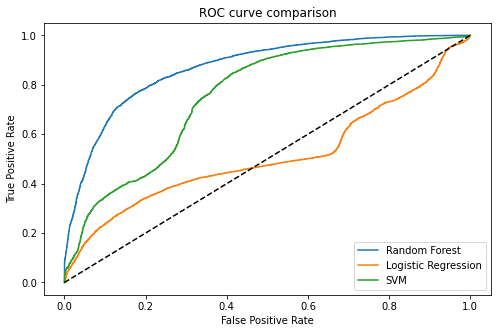

In [38]:
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr, label ="Random Forest")
plt.plot(fpr_lg, tpr_lg, label = "Logistic Regression")
plt.plot(fpr_svm, tpr_svm, label = "SVM")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize = 10)
plt.title("ROC curve comparison")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(loc = "lower right")
plt.show()

In [ ]:
filename = 'models/supervised_link_pred.sav'
pickle.dump(model, open(filename, 'wb'))
 